In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
df = pd.read_csv(r"C:\Users\ADITYA\OneDrive - Shiv Nadar Foundation\Desktop\New folder\onlinefoods.csv")


In [20]:
df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [21]:
df.shape

(388, 13)

In [22]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [23]:
df[df.columns[-1]].value_counts()

Unnamed: 12
Yes    301
No      87
Name: count, dtype: int64

In [24]:
df["Output"].value_counts()

Output
Yes    301
No      87
Name: count, dtype: int64

In [25]:
df.drop("Unnamed: 12", axis=1, inplace=True)

In [26]:
categoricals = ["Gender", "Marital Status", "Occupation",
               "Monthly Income", "Educational Qualifications",
               "Family size", "Output", "Feedback"]

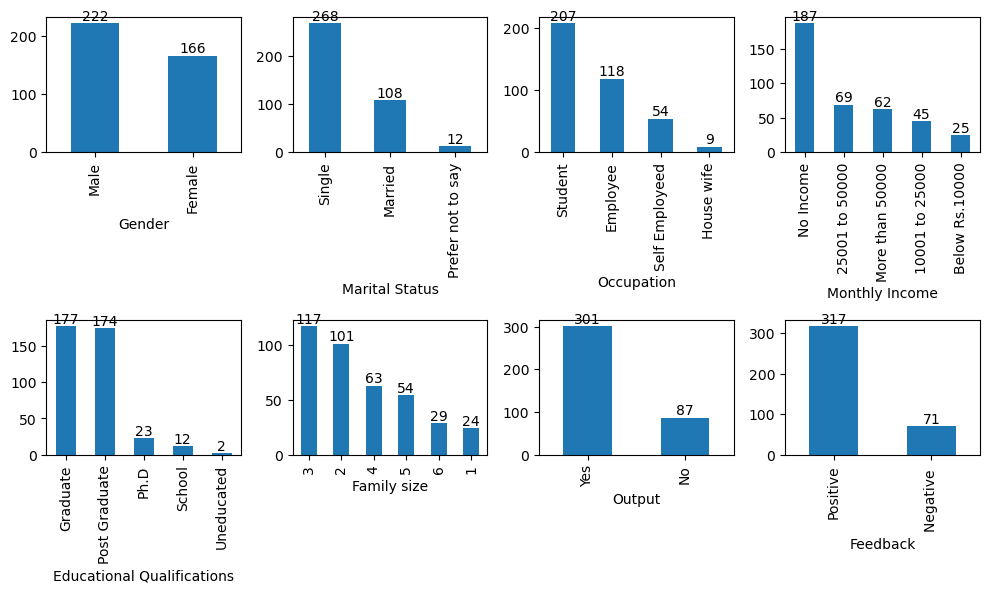

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(4):
        df[categoricals[index]].value_counts().plot(kind="bar", ax=axes[i][j])
        index += 1
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container)
plt.tight_layout()
plt.show()

IndexError: list index out of range

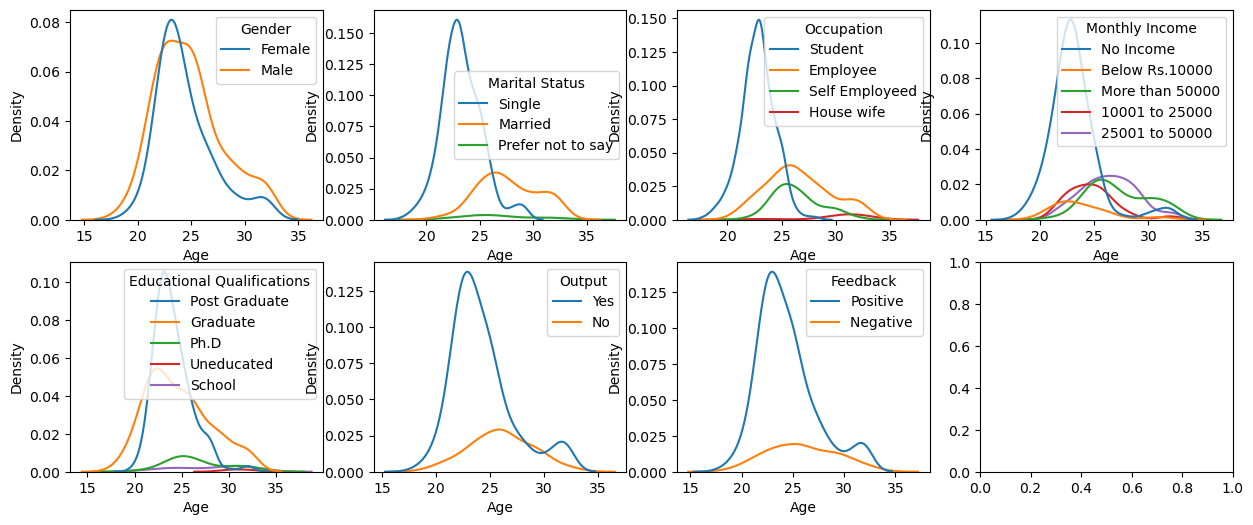

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
index = 0
for i in range(2):
    for j in range(4):
        sns.kdeplot(df, x="Age", hue=categoricals[index], ax=axes[i][j])
        index += 1
plt.tight_layout()
plt.show()

IndexError: list index out of range

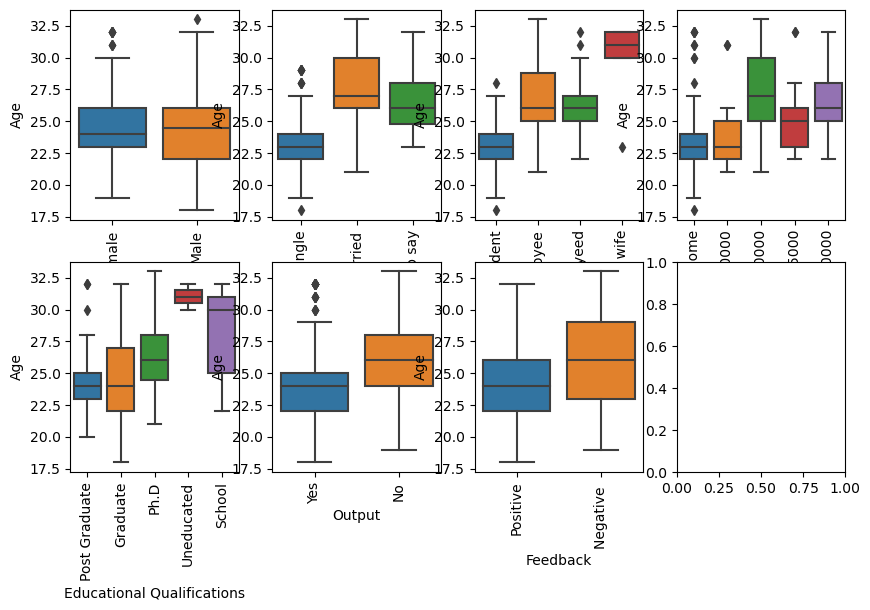

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(4):
        sns.boxplot(df, y="Age", x=categoricals[index], ax=axes[i][j])
        axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=90)
        index += 1
plt.tight_layout()
plt.show()


In [34]:
le = LabelEncoder()
for i in categoricals:
    df[i] = le.fit_transform(df[i])

In [35]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [37]:
smote = SMOTE()
print("Before ", Counter(y_train))
x_train, y_train = smote.fit_resample(x_train, y_train)
print("After ", Counter(y_train))

Before  Counter({1: 250, 0: 60})
After  Counter({1: 250, 0: 250})


In [38]:
def training(model, name, axes):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, ax=axes)
    axes.set_title("{}: {}%".format(name, round(score*100, 2)))
    return score*100, report

In [40]:
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
svc = SVC()
lgr = LogisticRegression()

models = [rfc, etc, gbc, abc,svc, lgr]
names = ["Random Forest", "Extra Trees", "Gradient Boost", "Ada Boost",
        "XGB", "Support Vectors", "Logistic Regression"]

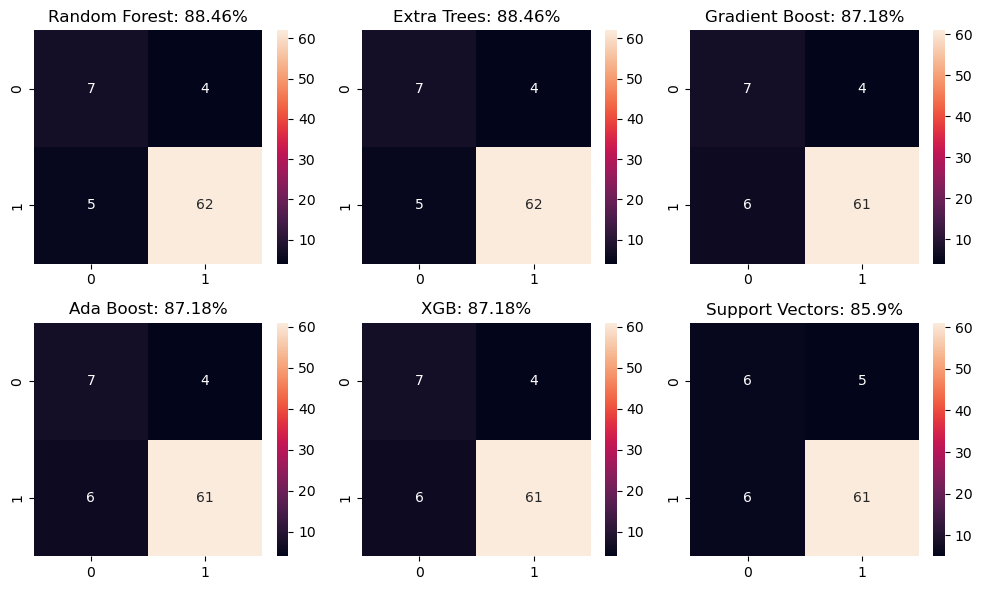

In [43]:
scores, reports = [], []  # Initialize two empty lists separately
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(3):
        if index < len(models):  # Ensure index is within bounds
            score, report = training(models[index], names[index], axes[i][j])
            scores.append(score)
            reports.append(report)
            index += 1

plt.tight_layout()
plt.show()

# Don't run the second block if index is already out of bounds
if index < len(models):  # Only call training if index is within the list range
    fig, axes = plt.subplots()
    score, report = training(models[index], names[index], axes)
    scores.append(score)
    reports.append(report)
    plt.show()


Length of scores: 6
Length of names: 7


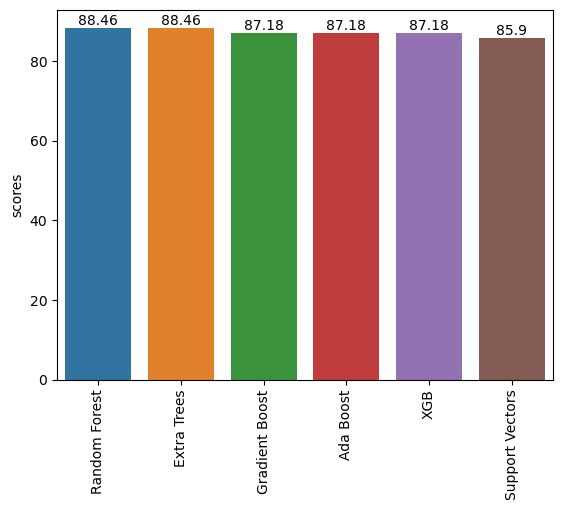

In [45]:
# Check the lengths of the lists
print(f"Length of scores: {len(scores)}")
print(f"Length of names: {len(names)}")

# Make sure both lists have the same length
if len(scores) > len(names):
    # Remove extra score if scores list is longer
    scores = scores[:len(names)]
elif len(names) > len(scores):
    # Remove extra name if names list is longer
    names = names[:len(scores)]

# Now that the lengths match, create the DataFrame
dt = pd.DataFrame({"scores": scores}, index=names)
dt = dt.sort_values("scores", ascending=False)
dt["scores"] = round(dt["scores"], 2)

# Plotting
fig, axes = plt.subplots()
sns.barplot(x=dt.index, y=dt["scores"], ax=axes)

# Add labels to the bars
for container in axes.containers:
    axes.bar_label(container)

# Rotate the x-axis labels for readability
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()


In [46]:
for i, j in zip(names, reports):
    print("*"*30)
    print(i)
    print(j)
    print("\n\n")

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.94      0.93      0.93        67

    accuracy                           0.88        78
   macro avg       0.76      0.78      0.77        78
weighted avg       0.89      0.88      0.89        78




******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.94      0.93      0.93        67

    accuracy                           0.88        78
   macro avg       0.76      0.78      0.77        78
weighted avg       0.89      0.88      0.89        78




******************************
Gradient Boost
              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.94      0.91      0.92        67

    accuracy                           0.8